# Libraries and Dependencies

In [1]:
# Install xgboost (if not already installed)
!pip install xgboost

# Essential Libraries for Data Processing
import pandas as pd
import numpy as np

# For Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif

# For Model Building
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# For Data Splitting and Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# For Data Preprocessing
from sklearn.impute import SimpleImputer

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Data Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.7/291.7 MB 3.7 MB/s eta 0:00:00


In [2]:
# Load datasets
train_transaction = pd.read_csv('train_transaction.csv')
train_identity = pd.read_csv('train_identity.csv')
test_transaction = pd.read_csv('test_transaction.csv')
test_identity = pd.read_csv('test_identity.csv')


<ipython-input-2-33a7e97ade0e>:5: DtypeWarning: Columns (0,3,13,17,18,19,20,21,22,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  test_identity = pd.read_csv('test_identity.csv')


In [25]:
# Check original datasets' shapes
print(f"train_transaction shape: {train_transaction.shape}")
print(f"train_identity shape: {train_identity.shape}")
print(f"test_transaction shape: {test_transaction.shape}")
print(f"test_identity shape: {test_identity.shape}")


train_transaction shape: (590540, 394)
train_identity shape: (144233, 41)
test_transaction shape: (506691, 393)
test_identity shape: (151118, 41)


In [6]:
# Check for missing values
print("\nMissing Values in Train Transaction:")
print(train_transaction.isnull().sum().sort_values(ascending=False).head(20))  # Top 20 columns with most missing values
print("\nMissing Values in Train Identity:")
print(train_identity.isnull().sum().sort_values(ascending=False).head(20))


Missing Values in Train Transaction:
dist2    552913
D7       551623
D13      528588
D14      528353
D12      525823
D6       517353
D8       515614
D9       515614
V162     508595
V142     508595
V146     508595
V147     508595
V141     508595
V138     508595
V163     508595
V161     508595
V154     508595
V153     508595
V158     508595
V157     508595
dtype: int64

Missing Values in Train Identity:
id_24         139486
id_25         139101
id_07         139078
id_08         139078
id_21         139074
id_26         139070
id_23         139064
id_27         139064
id_22         139064
id_18          99120
id_04          77909
id_03          77909
id_33          70944
id_10          69307
id_09          69307
id_30          66668
id_32          66647
id_34          66428
id_14          64189
DeviceInfo     25567
dtype: int64


In [7]:
# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display all columns of train_transaction
print("Columns in train_transaction:")
print(train_transaction.columns.tolist())

# Display all columns of train_identity
print("\nColumns in train_identity:")
print(train_identity.columns.tolist())

print("\nColumns in test_transaction:")
print(test_transaction.columns.tolist())

print("\nColumns in test_identity:")
print(test_identity.columns.tolist())


Columns in train_transaction:
['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 

In [8]:
# Merge transaction and identity datasets
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

In [10]:
# Check shape of merged datasets
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

Train shape: (590540, 434)
Test shape: (506691, 433)


###Exploratory Data Visualization

####Fraudulent Transactions Distribution

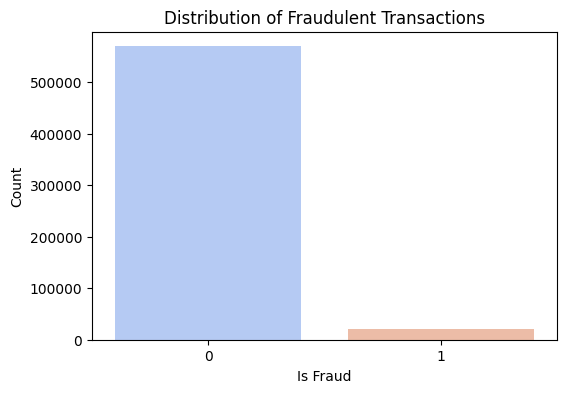


Fraud Rate: 3.50%


In [11]:
# Ensure isFraud column is categorical
if "isFraud" in train.columns:
    train["isFraud"] = train["isFraud"].astype("category")

    plt.figure(figsize=(6, 4))
    sns.countplot(x="isFraud", data=train, hue="isFraud", palette="coolwarm", legend=False)  # Adjusted for the new behavior
    plt.title("Distribution of Fraudulent Transactions")
    plt.xlabel("Is Fraud")
    plt.ylabel("Count")
    plt.show()

    # Convert 'isFraud' to numeric (int) for mean calculation
    train["isFraud"] = train["isFraud"].cat.codes

    # Fraud rate calculation
    fraud_rate = train["isFraud"].mean()
    print(f"\nFraud Rate: {fraud_rate * 100:.2f}%")


###Transaction Amounts Distribution

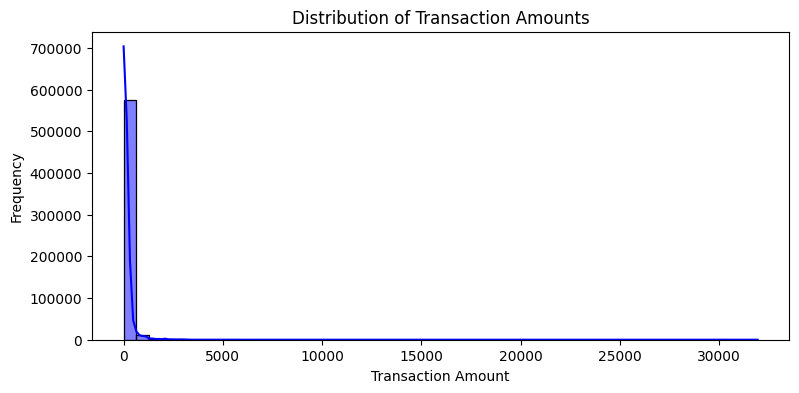

In [12]:
# Distribution of transaction amounts
plt.figure(figsize=(9, 4))
sns.histplot(train["TransactionAmt"], bins=50, kde=True, color="blue")
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()





###Comparison of Fraud vs. Non-Fraud Transaction Amounts

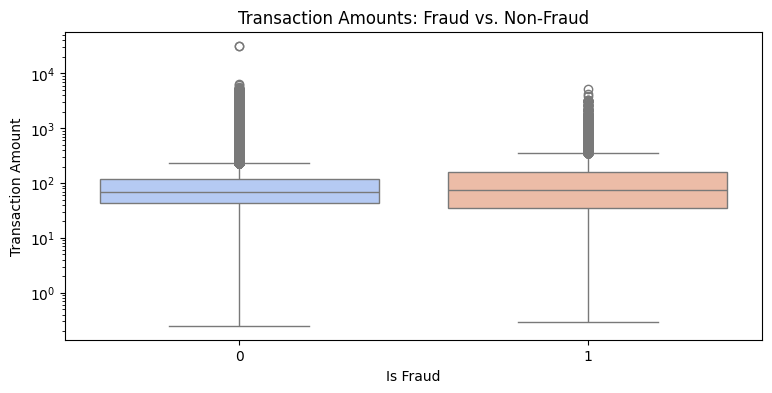

In [13]:
# Fraud vs. Non-Fraud transaction amounts
if "isFraud" in train.columns:
    plt.figure(figsize=(9, 4))
    sns.boxplot(x="isFraud", y="TransactionAmt", hue="isFraud", data=train, palette="coolwarm", legend=False)
    plt.title("Transaction Amounts: Fraud vs. Non-Fraud")
    plt.xlabel("Is Fraud")
    plt.ylabel("Transaction Amount")
    plt.yscale("log")  # Log scale for better visibility
    plt.show()

###Correlation Matrix Heatmap

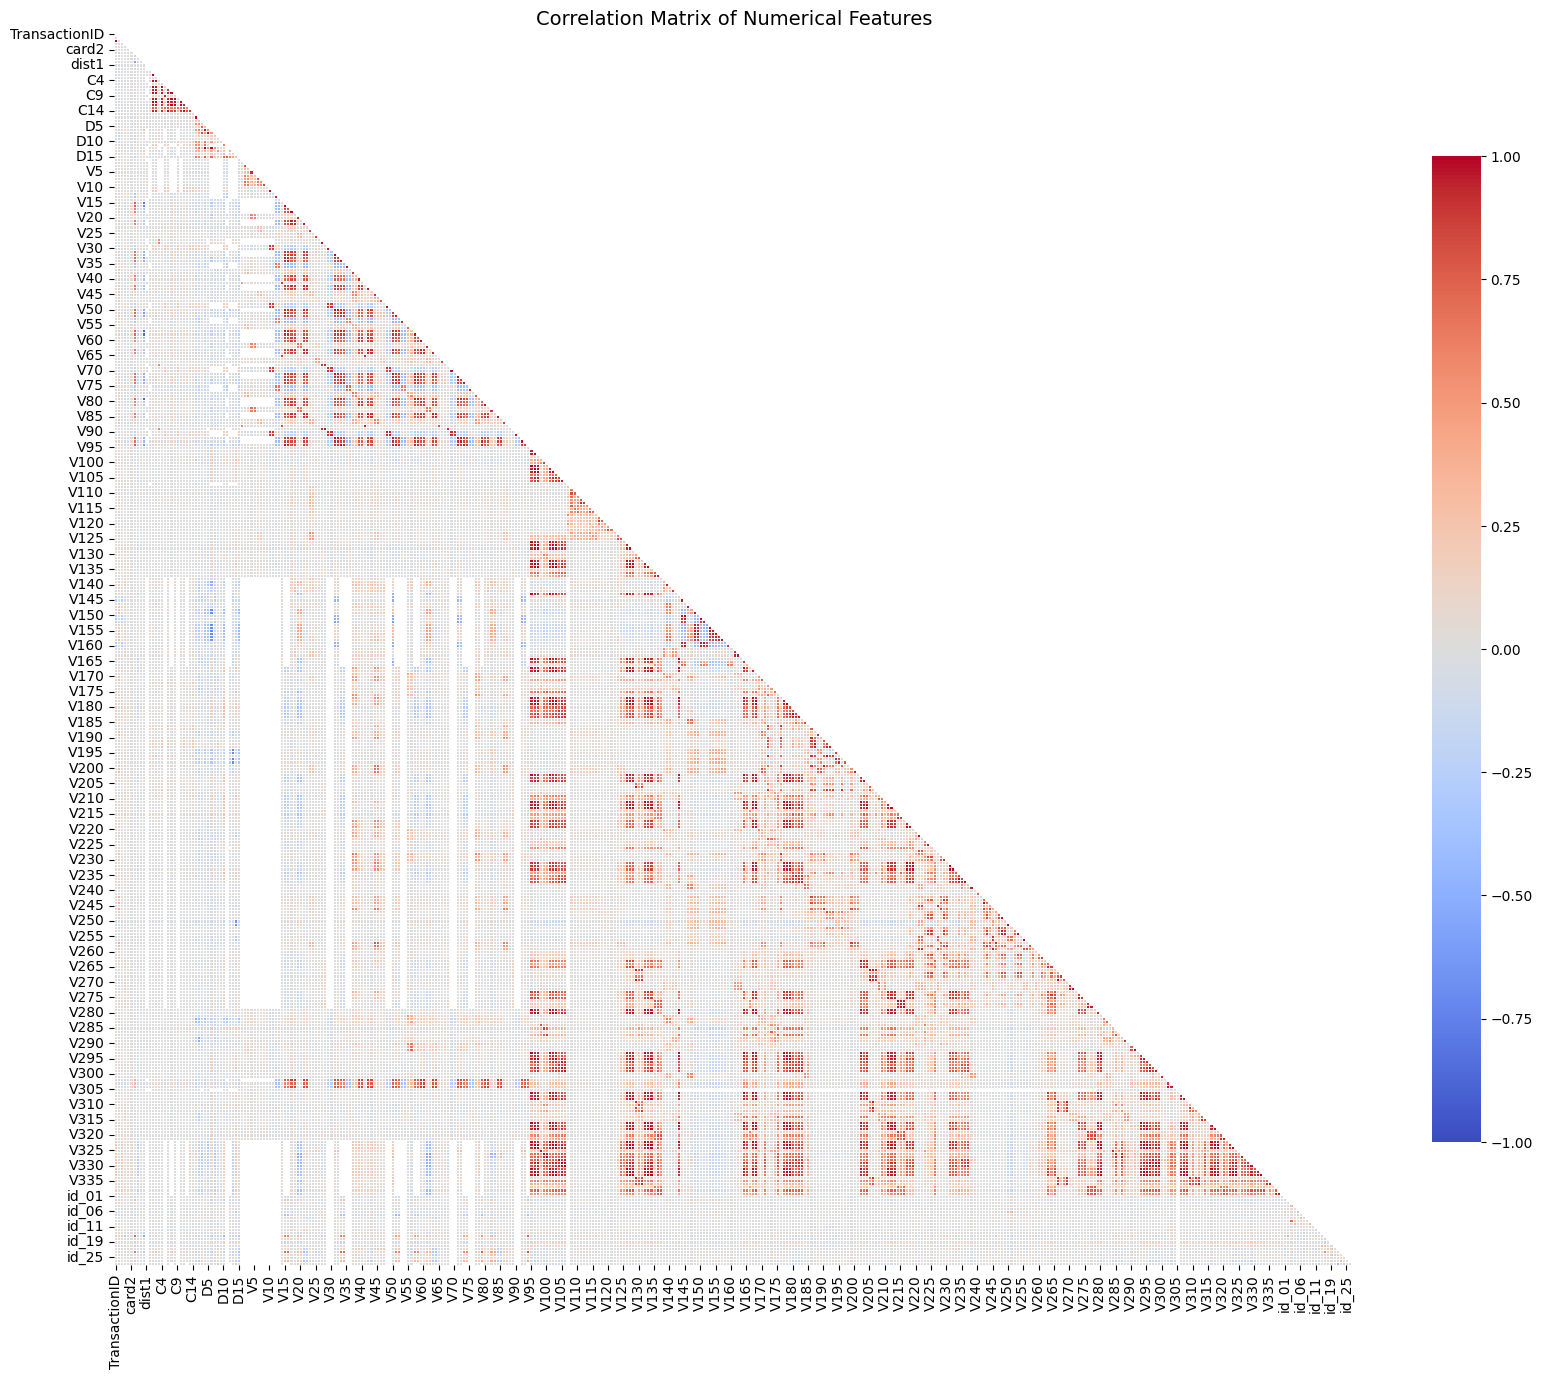

In [ ]:
# Select numerical features
numerical_features = train.select_dtypes(include=[np.number]).columns

# Compute correlation matrix
corr_matrix = train[numerical_features].corr()

# Create mask to hide upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set figure size
plt.figure(figsize=(20, 16))

# Generate heatmap
sns.heatmap(corr_matrix, mask=mask, cmap="coolwarm", annot=False, fmt=".2f",
            linewidths=0.5, vmin=-1, vmax=1, cbar_kws={"shrink": 0.8})

# Improve label visibility
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Add title
plt.title("Correlation Matrix of Numerical Features", fontsize=14)

# Show plot
plt.show()


###Fraud Rate Analysis by Product Category


Fraud Rate by ProductCD:
ProductCD
W    0.020399
R    0.037826
H    0.047662
S    0.058996
C    0.116873
Name: isFraud, dtype: float64


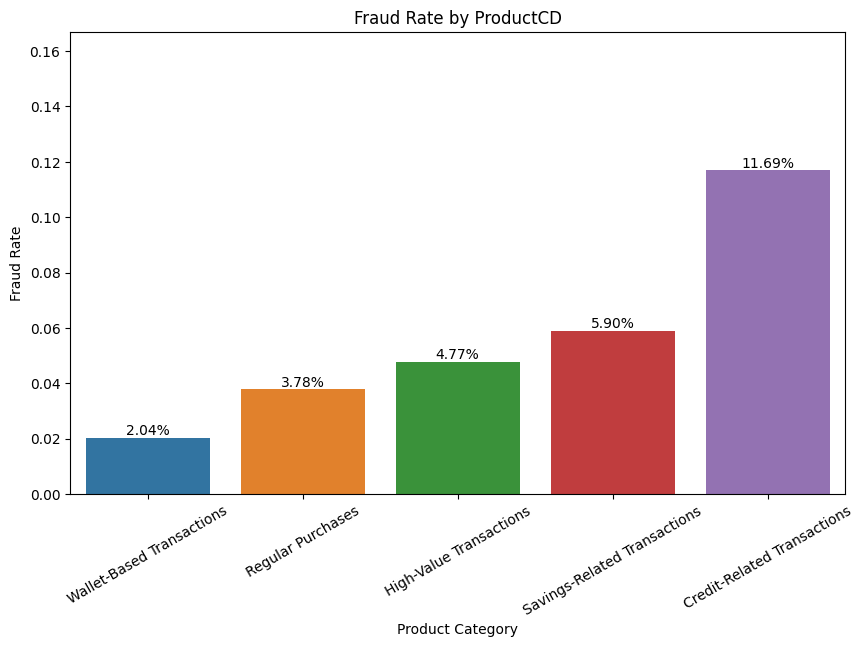

In [ ]:
# Define ProductCD full forms (move this above usage!)
product_full_forms = {
    "H": "High-Value Transactions",
    "W": "Wallet-Based Transactions",
    "S": "Savings-Related Transactions",
    "R": "Regular Purchases",
    "C": "Credit-Related Transactions"
}

# Fraud rate by ProductCD
if "ProductCD" in train.columns:
    fraud_by_product = train.groupby("ProductCD")["isFraud"].mean().sort_values()

    print("\nFraud Rate by ProductCD:")
    print(fraud_by_product)

    # Map full names for better visualization
    fraud_by_product.index = fraud_by_product.index.map(product_full_forms)

    # Visualize fraud rate by ProductCD
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=fraud_by_product.index, y=fraud_by_product.values, hue=fraud_by_product.index, legend=False)

    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2%}", (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha="center", va="bottom", fontsize=10, color="black")

    plt.title("Fraud Rate by ProductCD")
    plt.xlabel("Product Category")
    plt.ylabel("Fraud Rate")
    plt.xticks(rotation=30)
    plt.ylim(0, fraud_by_product.max() + 0.05)
    plt.show()


###Fraud Rate Analysis by Email Domain


Top 10 Fraud Rates by Email Domain (P_emaildomain):
P_emaildomain
protonmail.com    0.407895
mail.com          0.189624
outlook.es        0.130137
aim.com           0.126984
outlook.com       0.094584
hotmail.es        0.065574
live.com.mx       0.054740
hotmail.com       0.052950
gmail.com         0.043542
yahoo.fr          0.034965
Name: isFraud, dtype: float64


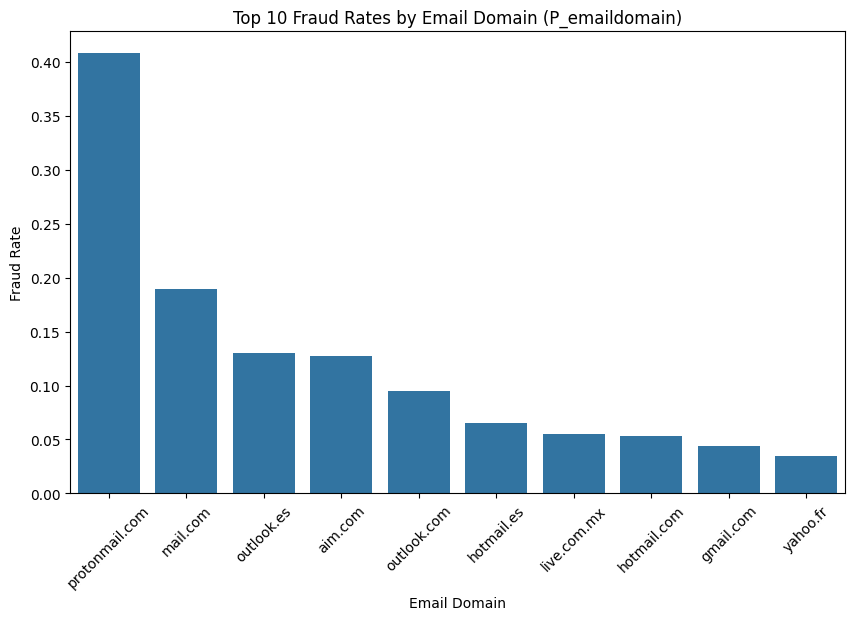

In [14]:
# Fraud rate by email domain (P_emaildomain)
if 'P_emaildomain' in train.columns:
    fraud_by_email = train.groupby('P_emaildomain')['isFraud'].mean().sort_values(ascending=False).head(10)
    print("\nTop 10 Fraud Rates by Email Domain (P_emaildomain):")
    print(fraud_by_email)

    # Visualize fraud rate by email domain
    plt.figure(figsize=(10, 6))
    sns.barplot(x=fraud_by_email.index, y=fraud_by_email.values)
    plt.title('Top 10 Fraud Rates by Email Domain (P_emaildomain)')
    plt.xlabel('Email Domain')
    plt.ylabel('Fraud Rate')
    plt.xticks(rotation=45)
    plt.show()

###Data Preprocessing
In this process, the training and testing datasets are first combined into a single dataset to simplify preprocessing. Columns with over 80% missing values are dropped to retain only relevant features. Categorical columns are label-encoded to convert them into numeric values, making them compatible with machine learning models. Missing values in the dataset are imputed using the median value of each column to avoid data loss. Finally, the dataset is split back into the original training and testing sets, with unnecessary columns removed, preparing the data for modeling and further analysis.

In [15]:
# 1. Save target
y_train = train['isFraud']

# 2. Combine datasets
train['isTrain'] = 1
test['isTrain'] = 0
test['isFraud'] = np.nan
full_data = pd.concat([train, test], axis=0, ignore_index=True)

print(f"\nCombined full_data shape: {full_data.shape}")

# 3. Drop columns with >80% missing values
missing_thresh = 0.8
missing = full_data.isnull().mean()
dropped_cols = missing[missing > missing_thresh].index.tolist()

print(f"\nDropping {len(dropped_cols)} columns due to >80% missing:")
print(dropped_cols)

full_data.drop(columns=dropped_cols, inplace=True)

# 4. Label encode categorical columns
cat_cols = full_data.select_dtypes(include=['object']).columns.tolist()
print(f"\nEncoding {len(cat_cols)} categorical columns")

for col in cat_cols:
    full_data[col] = full_data[col].astype(str)
    le = LabelEncoder()
    full_data[col] = le.fit_transform(full_data[col])

print(f"Column count before imputation: {full_data.shape[1]}")

# 5. Impute missing values
imputer = SimpleImputer(strategy='median')
full_data_imputed = pd.DataFrame(imputer.fit_transform(full_data), columns=full_data.columns)

# 6. Split back into train/test
train_preprocessed = full_data_imputed[full_data_imputed['isTrain'] == 1].drop(columns=['isTrain'])
test_preprocessed = full_data_imputed[full_data_imputed['isTrain'] == 0].drop(columns=['isTrain', 'isFraud'])

# Final Output
print("\nPreprocessing Complete")
print("Train shape:", train_preprocessed.shape)
print("Test shape:", test_preprocessed.shape)



Combined full_data shape: (1097231, 473)

Dropping 131 columns due to >80% missing:
['dist2', 'D6', 'D7', 'D8', 'D9', 'D12', 'D13', 'D14', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'id-01', 'id-02', 'id-03', 'id-04', 'id-05', 'id-06', 'id-07', 'id-08', 'id-09', 'id-10', 'id-11', 'id-12', 'id-13', 'id-14', 'id-15', 'id-16'

In this process, the training and testing datasets are merged into a single dataset. Columns with over 80% missing values are dropped, resulting in the removal of 131 columns. The remaining categorical columns are label-encoded into numeric values, ensuring the data is ready for machine learning. After encoding, missing values in the dataset are handled, and the dataset is split back into the original training and testing sets. The final preprocessed datasets are now ready for modeling, with the training set containing 341 features and the test set 340 features.

###Feature Engineering
Creating New Features: Create new engineered features such as binary features, transaction bins, aggregates, and time-based features



### Feature Engineering Applied to Train and Test Datasets

In this process, several feature engineering techniques are applied to both the training and testing datasets:

1. **Binary Features**:  
   New features are created to mark high-risk categories, such as whether the product category is 'C' and whether the card type is 'debit'.

2. **Binning**:  
   Transaction amounts are grouped into five bins based on their rank, allowing for better categorization and analysis of transaction sizes.

3. **Aggregated Features**:  
   New features are created to track the count and average transaction amount for each unique card (`card1`), providing insights into individual card activity.

4. **Time-Based Features**:  
   New features are derived from the transaction timestamp, including the transaction hour and the day of the week, which could reveal patterns in fraud behavior.

5. **Interaction Features**:  
   Interaction features are created by multiplying transaction amounts by the binary features, capturing more complex relationships between the data.

6. **Domain-Based Fraud Rates**:  
   Fraud rates for email domains and address 1 (`addr1`) are calculated based on the target variable `isFraud` and mapped to the respective rows, providing insights into potentially high-risk domains or addresses.

7. **Log Transformation**:  
   A log transformation is applied to the transaction amounts to reduce skewness and stabilize variance.

These engineered features are designed to improve the performance of machine learning models by providing more meaningful and informative data.


In [16]:
import numpy as np
import pandas as pd

# Binary Features: Mark high-risk categories
train['is_ProductC'] = (train['ProductCD'] == 'C').astype(int)
test['is_ProductC'] = (test['ProductCD'] == 'C').astype(int)

train['is_Mobile'] = (train['card6'] == 'debit').astype(int)
test['is_Mobile'] = (test['card6'] == 'debit').astype(int)

# Binning: Group TransactionAmt into 5 bins
train['TransactionAmt_bin'] = pd.qcut(train['TransactionAmt'].rank(method='first'), q=5, labels=False)
test['TransactionAmt_bin'] = pd.qcut(test['TransactionAmt'].rank(method='first'), q=5, labels=False)

# Aggregated Features
train['card1_trans_count'] = train.groupby('card1')['TransactionID'].transform('count')
test['card1_trans_count'] = test.groupby('card1')['TransactionID'].transform('count')

train['card1_avg_trans_amt'] = train.groupby('card1')['TransactionAmt'].transform('mean')
test['card1_avg_trans_amt'] = test.groupby('card1')['TransactionAmt'].transform('mean')

# Time-Based Features
train['Transaction_hour'] = (train['TransactionDT'] // 3600) % 24
test['Transaction_hour'] = (test['TransactionDT'] // 3600) % 24

train['Transaction_day'] = (train['TransactionDT'] // (3600 * 24)) % 7
test['Transaction_day'] = (test['TransactionDT'] // (3600 * 24)) % 7

# Interaction Features
train['Amt_ProductC'] = train['TransactionAmt'] * train['is_ProductC']
test['Amt_ProductC'] = test['TransactionAmt'] * test['is_ProductC']

train['Amt_Mobile'] = train['TransactionAmt'] * train['is_Mobile']
test['Amt_Mobile'] = test['TransactionAmt'] * test['is_Mobile']

# Email Domain-Based Fraud Rates
email_fraud_rate = train.groupby('P_emaildomain')['isFraud'].mean().to_dict()
train['P_emaildomain_fraud_rate'] = train['P_emaildomain'].map(email_fraud_rate).fillna(0)
test['P_emaildomain_fraud_rate'] = test['P_emaildomain'].map(email_fraud_rate).fillna(0)

# Address-Based Fraud Rates
addr1_fraud_rate = train.groupby('addr1')['isFraud'].mean().to_dict()
train['addr1_fraud_rate'] = train['addr1'].map(addr1_fraud_rate).fillna(0)
test['addr1_fraud_rate'] = test['addr1'].map(addr1_fraud_rate).fillna(0)

# Log Transform
train['TransactionAmt_log'] = np.log1p(train['TransactionAmt'])
test['TransactionAmt_log'] = np.log1p(test['TransactionAmt'])

print("Feature Engineering Applied to Train and Test")


Feature Engineering Applied to Train and Test


###Feature Selection
Applying SelectKBest: Apply SelectKBest to select the top 30 features using the ANOVA F-test


### Feature Selection Process

In this step, we apply feature selection techniques to reduce the dimensionality of the dataset and retain the most relevant features for modeling. The following steps are performed:

1. **Remove Constant Columns**:  
   Columns where all values are the same (constant) are removed, as they do not provide any useful information for the model.

2. **Remove Duplicate Columns**:  
   Columns that are duplicates of others (i.e., they have identical values across all rows) are removed to avoid redundancy.

3. **Correlation Filter**:  
   Highly correlated features (with a correlation coefficient greater than 0.95) are dropped to reduce multicollinearity and ensure the model is not biased by highly correlated variables.

4. **Univariate Selection Using SelectKBest (ANOVA F-test)**:  
   SelectKBest is applied to select the top 50 features (you can adjust `k` based on your needs) using the ANOVA F-test. This test evaluates the relationship between each feature and the target variable (`isFraud`).

These steps result in a refined dataset containing the most important features, improving the model’s ability to generalize and making the training process more efficient.


In [17]:
from sklearn.feature_selection import SelectKBest, f_classif

# Step 1: Remove constant columns
nunique = train_preprocessed.nunique()
constant_cols = nunique[nunique == 1].index
train_fs = train_preprocessed.drop(columns=constant_cols)
print(f"Dropped {len(constant_cols)} constant columns")

# Step 2: Remove duplicate columns
dup_cols = set()
cols = train_fs.columns.drop('isFraud')
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        if np.array_equal(train_fs[cols[i]].values, train_fs[cols[j]].values):
            dup_cols.add(cols[j])
train_fs = train_fs.drop(columns=list(dup_cols))
print(f"Dropped {len(dup_cols)} duplicate columns")

# Step 3: Correlation filter
cor_matrix = train_fs.drop(columns=['isFraud']).corr().abs()
upper = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
to_drop_corr = [column for column in upper.columns if any(upper[column] > 0.95)]
train_fs = train_fs.drop(columns=to_drop_corr)
print(f"Dropped {len(to_drop_corr)} highly correlated columns")

# Step 4: Univariate selection using SelectKBest (ANOVA F-test)
X = train_fs.drop(columns=['isFraud'])
y = train_fs['isFraud']

selector = SelectKBest(score_func=f_classif, k=50)  # You can tune k as needed
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_mask = selector.get_support()
selected_features = X.columns[selected_mask]

print(f"Selected Top {len(selected_features)} Features:")
print(selected_features.tolist())


Dropped 0 constant columns
Dropped 0 duplicate columns
Dropped 88 highly correlated columns
Selected Top 50 Features:
['ProductCD', 'card3', 'V15', 'V17', 'V23', 'V31', 'V37', 'V38', 'V39', 'V40', 'V42', 'V44', 'V45', 'V47', 'V50', 'V51', 'V57', 'V59', 'V63', 'V64', 'V71', 'V73', 'V77', 'V78', 'V79', 'V80', 'V84', 'V85', 'V86', 'V87', 'V92', 'V123', 'V170', 'V171', 'V176', 'V188', 'V189', 'V190', 'V200', 'V201', 'V228', 'V230', 'V242', 'V243', 'V246', 'V247', 'V257', 'V258', 'V302', 'V303']


###Modeling

###Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

# Use selected features
X = train_fs[selected_features]
y = train_fs['isFraud']

# Split into training and validation sets
X_train, X_val, y_train_, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize and train Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train_)

# Predict on validation set
y_pred = rf.predict(X_val)
y_proba = rf.predict_proba(X_val)[:, 1]  # for ROC-AUC

# Evaluation metrics
print("Classification Report:\n", classification_report(y_val, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_val, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.87      0.92    113975
         1.0       0.14      0.56      0.22      4133

    accuracy                           0.86    118108
   macro avg       0.56      0.71      0.57    118108
weighted avg       0.95      0.86      0.90    118108

ROC-AUC Score: 0.7570607026821022
Confusion Matrix:
 [[99378 14597]
 [ 1832  2301]]


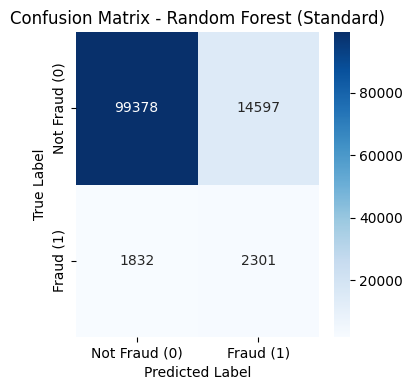

In [22]:
# Predict
y_pred = rf.predict(X_val)

# Compute confusion matrix
cm_rf = confusion_matrix(y_val, y_pred)

# Plot
plt.figure(figsize=(4, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud (0)', 'Fraud (1)'],
            yticklabels=['Not Fraud (0)', 'Fraud (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest (Standard)')
plt.tight_layout()
plt.show()


###XGBoost Classifier

In [ ]:
!pip install xgboost


In [20]:
# Use selected features
X = train_fs[selected_features]
y = train_fs['isFraud']

# Train-test split
X_train, X_val, y_train_, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Initialize XGBoost
model = XGBClassifier(
    n_estimators=100,
    max_depth=10,
    learning_rate=0.1,
    scale_pos_weight=20,
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42
)

# Train the model
model.fit(X_train, y_train_)

# Predict
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)[:, 1]

# Evaluate
print("Classification Report:\n", classification_report(y_val, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_val, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.95      0.97    113975
         1.0       0.27      0.48      0.34      4133

    accuracy                           0.94    118108
   macro avg       0.62      0.72      0.65    118108
weighted avg       0.96      0.94      0.94    118108

ROC-AUC Score: 0.7658119659934082
Confusion Matrix:
 [[108430   5545]
 [  2129   2004]]


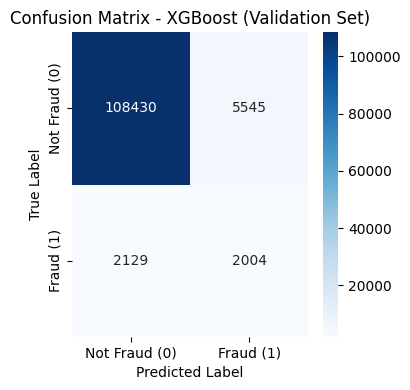

In [21]:
# Create the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud (0)', 'Fraud (1)'],
            yticklabels=['Not Fraud (0)', 'Fraud (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost (Validation Set)')
plt.tight_layout()
plt.show()


###Fraud Prediction and Submission Pipeline with XGBoost


In [23]:
# Train the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train_)  # Ensure X_train and y_train_ are defined correctly

# Step 1: Predict probabilities using XGBoost on the test set
xgb_test_proba = xgb_model.predict_proba(test_preprocessed[selected_features])[:, 1]

# Step 2: Apply threshold (adjust if needed)
xgb_test_pred = (xgb_test_proba > 0.5).astype(int)

# Step 3: Create submission
prediction_submission = pd.DataFrame({
    'TransactionID': test['TransactionID'],
    'isFraud': xgb_test_pred
})

# Step 4: Save to CSV
prediction_submission.to_csv('prediction_submission.csv', index=False)
print("Predictions saved as 'prediction_submission.csv'")


Predictions saved as 'prediction_submission.csv'


###Risk Scoring Integration

### Rule-Based Risk Scoring for Fraud Detection

In this section, we define and apply a **rule-based risk scoring system** to assess the risk level of each transaction. The steps are as follows:

1. **Define the Rule-Based Risk Scoring Function**:  
   The function `apply_risk_scoring(df)` is used to assign a risk score based on specific transaction attributes. The rules used are:
   - High-risk product categories (`ProductCD` values of 'C' or 'R').
   - Risky card types (`card6` values of 'debit' or 'charge').
   - High transaction amounts (greater than 1500).
   - Transactions occurring during odd hours (0 AM to 5 AM).
   - Risky email domains (`P_emaildomain` containing certain values like 'aol.com', 'mail.com', or 'yahoo.com').

   Each of these rules adds a specified score to the `risk_score` column.

2. **Apply Risk Scoring**:  
   We then apply the `apply_risk_scoring()` function to the test data, which computes the risk scores for each transaction.

3. **Merge Model Predictions with Risk Scores**:  
   The model predictions (from `prediction_submission`) are merged with the risk scores and risk levels calculated earlier.

4. **Save the Final Output**:  
   The final result, which includes transaction IDs, risk scores, and the assigned risk levels, is saved to a CSV file for further use.

This approach allows us to add an additional layer of manual risk assessment to the model's predictions, enhancing the final output.


In [24]:
# Step 1: Define rule-based risk scoring function
def apply_risk_scoring(df):
    df = df.copy()
    df['risk_score'] = 0

    # ➤ Rule 1: High-risk product categories
    df['risk_score'] += df['ProductCD'].isin(['C', 'R']) * 10

    # ➤ Rule 2: Risky card types
    df['risk_score'] += df['card6'].isin(['debit', 'charge']) * 8

    # ➤ Rule 3: High transaction amounts
    df['risk_score'] += (df['TransactionAmt'] > 1500) * 12

    # ➤ Rule 4: Odd transaction hours (0 AM to 5 AM)
    if 'Transaction_hour' not in df.columns:
        df['Transaction_hour'] = pd.to_datetime(df['TransactionDT'], unit='s').dt.hour
    df['risk_score'] += df['Transaction_hour'].isin([0, 1, 2, 3, 4, 5]) * 7

    # ➤ Rule 5: Risky email domains
    df['P_emaildomain'] = df['P_emaildomain'].fillna('').str.lower()
    risky_domains = ['aol.com', 'mail.com', 'yahoo.com']
    df['risk_score'] += df['P_emaildomain'].str.contains('|'.join(risky_domains)).astype(int) * 6

    # ➤ Categorize risk level
    def categorize_risk(score):
        if score >= 30:
            return 'High'
        elif score >= 15:
            return 'Medium'
        else:
            return 'Low'

    df['risk_level'] = df['risk_score'].apply(categorize_risk)

    return df

# Step 2: Apply the risk scoring
test_with_risk = apply_risk_scoring(test.copy())

# Step 3: Merge model predictions with risk scores
submission_with_risk = prediction_submission.merge(
    test_with_risk[['TransactionID', 'risk_score', 'risk_level']],
    on='TransactionID',
    how='left'
)

# Step 4: Save the final output
submission_with_risk.to_csv('prediction_submission_withrisk.csv', index=False)
print("Predictions saved as 'prediction_submission_withrisk.csv'")


Predictions saved as 'prediction_submission_withrisk.csv'
